# **Building a Deep Learning Model to Classify Dogs and Cats: A Jupyter Notebook Tutorial I**

The field of deep learning has gained immense popularity in recent years, owing to its success in solving a wide range of complex problems, including image classification. In this Jupyter Notebook, we aim to build a deep learning model that can accurately classify images of dogs and cats. To achieve this goal, we start by preprocessing the dataset, which involves loading and resizing the images and converting them into arrays suitable for the CNN architecture. The preprocessed data is then randomized to ensure that the model does not overfit on the training data.

The main part of this Jupyter Notebook is building the first deep learning model using Keras library. The model is a convolutional neural network (CNN) that is designed to classify images of dogs and cats. The architecture of the model consists of three convolutional layers, each followed by a max-pooling layer, which reduces the dimensionality of the output. The last layer is a dense layer that produces a single output value between 0 and 1, indicating the probability that the input image is a dog or a cat. The model is compiled using the Adam optimizer and binary cross-entropy loss function, and the accuracy is evaluated using the 'accuracy' metric.

By the end of this Jupyter Notebook, we will have a trained deep learning model that can classify images of dogs and cats with high accuracy, which can be used for various applications, including image recognition and classification in the field of computer vision.

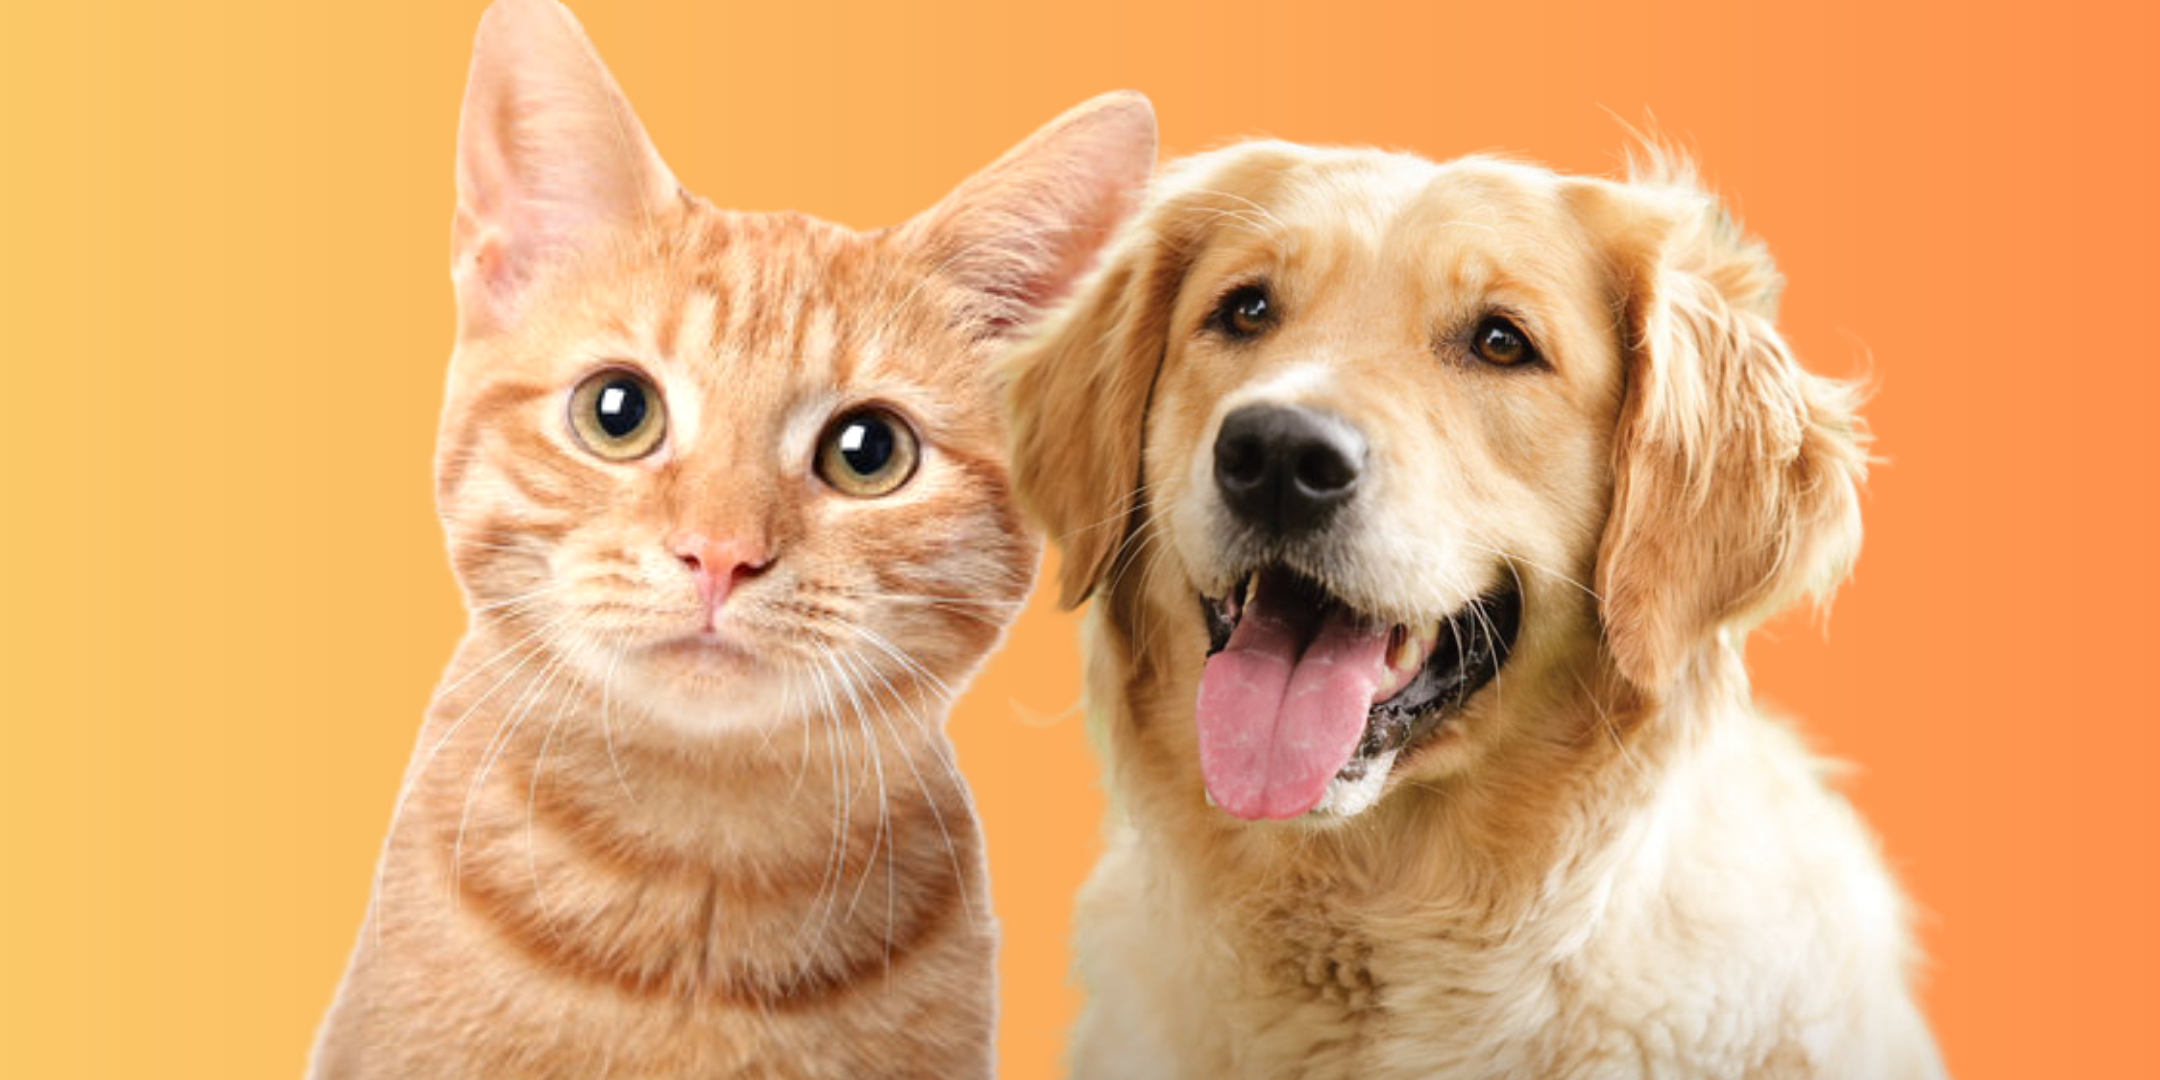

In [2]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pickle
from sklearn.model_selection import train_test_split

## **Loading the data**

Load the pickled files data X (features) and y (labels).

In [4]:
with open('pkl-files/X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('pkl-files/y.pkl', 'rb') as f:
    y = pickle.load(f)

## **Splitting the data**

In order to train and evaluate the deep learning model, we need to split the preprocessed data into training, validation, and test sets. The training set is used to train the model, the validation set is used to tune the hyperparameters and prevent overfitting, and the test set is used to evaluate the final performance of the model on unseen data. In this code block, we split the preprocessed data into training, validation, and test sets using the 'train_test_split' function from Scikit-Learn library. We also further split the training and validation sets to get more samples for training and validation. Finally, we print the sizes of the resulting datasets to ensure that the split is done correctly.

In [5]:
# Split data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

# Further split the training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True)

# Check the sizes of the resulting datasets
print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test))

Number of training samples: 13800
Number of validation samples: 4600
Number of test samples: 4600


## **Creating our first ConvNet**

In this code block, we define and build a deep learning model using the Keras library. The model consists of multiple layers of convolutional and pooling operations followed by two fully connected layers. The convolutional layers extract features from the input images, while the pooling layers downsample the feature maps to reduce the number of parameters and computation. The fully connected layers perform the classification task based on the extracted features. We also compile the model by specifying the optimizer, loss function, and evaluation metric. Finally, we print a summary of the model architecture to get an overview of the model's layers, parameters, and output shape.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape of the images
input_shape = (256, 256, 3)

# Build the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

## **Training the ConvNet**

Now we will train the model on our training set and validate it on the validation set. To prevent overfitting, we will use an early stopping callback. This will stop training the model if the validation loss doesn't improve for two epochs. We will fit the model on our training data for 10 epochs with a batch size of 32 and evaluate the performance on the validation set.

In [7]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
432/432 [==============================] - 140s 322ms/step - loss: 1.9466 - accuracy: 0.5362 - val_loss: 0.6868 - val_accuracy: 0.5254
Epoch 2/10
432/432 [==============================] - 142s 328ms/step - loss: 0.6851 - accuracy: 0.5456 - val_loss: 0.6861 - val_accuracy: 0.5372
Epoch 3/10
432/432 [==============================] - 149s 345ms/step - loss: 0.6713 - accuracy: 0.5741 - val_loss: 0.6815 - val_accuracy: 0.5639
Epoch 4/10
432/432 [==============================] - 145s 336ms/step - loss: 0.6550 - accuracy: 0.5978 - val_loss: 0.6808 - val_accuracy: 0.5676
Epoch 5/10
432/432 [==============================] - 153s 355ms/step - loss: 0.6321 - accuracy: 0.6280 - val_loss: 0.6664 - val_accuracy: 0.6115
Epoch 6/10
432/432 [==============================] - 146s 339ms/step - loss: 0.5968 - accuracy: 0.6678 - val_loss: 0.6555 - val_accuracy: 0.6367
Epoch 7/10
432/432 [==============================] - 147s 340ms/step - loss: 0.5420 - accuracy: 0.7180 - val_loss: 0.6659 -

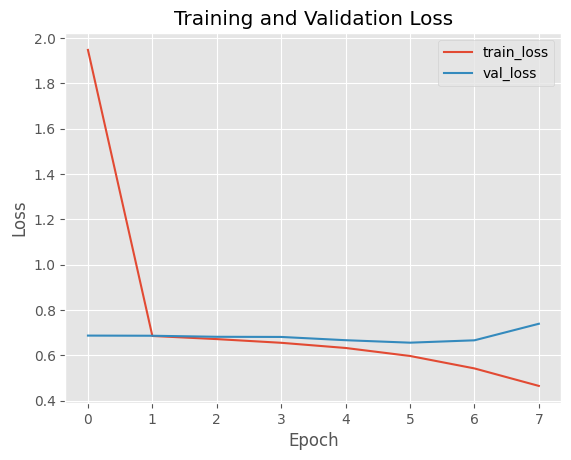

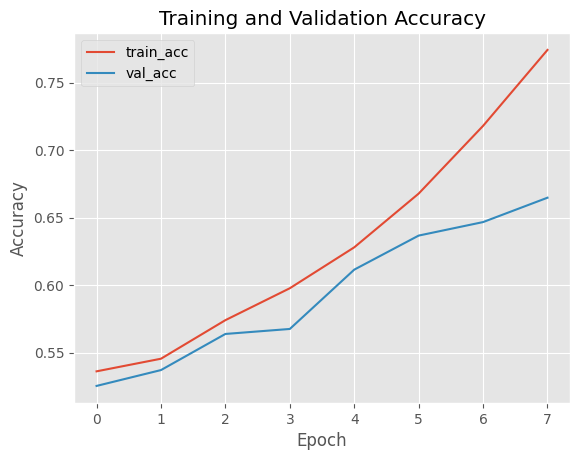

In [12]:
# Plot the loss curve for training and validation data
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plot the accuracy curve for training and validation data
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

## **Results and Conclusions**

These results show the training and validation loss and accuracy of a neural network model over the course of 8 epochs of training.

The training loss and accuracy are shown for each epoch, as well as the validation loss and accuracy. The training loss and accuracy measures how well the model is performing on the training data during each epoch, while the validation loss and accuracy measures how well the model is generalizing to new, unseen data.

In this specific case, we can see that the model's accuracy on the training data starts at 53.62% and improves gradually, reaching a peak of 77.42% in the 8th epoch. However, the validation accuracy starts at 52.54% and only improves slightly over the course of training, reaching a maximum of 66.48% in the 8th epoch. This suggests that the model is overfitting to the training data, meaning it is performing well on the data it has seen during training, but is not generalizing well to new data.

Additionally, we can see that the training and validation loss are decreasing at different rates, with the training loss decreasing more rapidly than the validation loss. This also suggests that the model is overfitting to the training data.

Finally, the EarlyStopping callback was used to stop the training early once the validation loss did not improve after 2 epochs. This prevented the model from continuing to overfit to the training data.

## **Next Steps**

* It may be worth experimenting with different hyperparameters such as the learning rate, batch size, number of filters in each convolutional layer, and the number of neurons in the fully connected layers to see if any improvements in model performance can be achieved.

* It may be useful to try different data augmentation techniques such as rotation, scaling, and flipping to increase the amount of data available for training and potentially improve the model's ability to generalize to new data.

* It may be worth exploring the use of pre-trained models such as VGG or ResNet, which have been trained on large image datasets and can be fine-tuned for specific image classification tasks.

We'll look at these steps in the following notebooks, stay tuned!